## Critical Points and Extrema Detection Techniques

In the realm of calculus, critical points and extrema detection techniques are essential tools for understanding the behavior of functions and identifying significant points within them.

### Critical Points

Critical points occur where the derivative of a function is zero or undefined. These points can indicate potential extrema (maxima or minima) or points of inflection.

### First Derivative Test for Extrema

The **first derivative test** helps determine whether a critical point corresponds to a local maximum, local minimum, or neither.

- If the first derivative changes sign from positive to negative at a critical point, it indicates a local maximum.
- If the first derivative changes sign from negative to positive at a critical point, it indicates a local minimum.

### Second Derivative Test for Extrema

The **second derivative test** provides further insight into the nature of extrema at critical points:

- If the second derivative is positive at a critical point, there's a local minimum.
- If the second derivative is negative at a critical point, there's a local maximum.
- If the second derivative is zero, the test is inconclusive.

### Formulas

Let's consider a function \( f(x) \) and its derivatives:

- First Derivative: \( f'(x) \)
- Second Derivative: \( f''(x) \)

#### Critical Points:

Critical points occur where the first derivative is zero or undefined:

\[ f'(x) = 0 \quad \text{or} \quad f'(x) \ \text{is undefined} \]

#### First Derivative Test:

To identify local extrema, observe the sign changes of the first derivative around critical points:

- If \( f'(x) \) changes from positive to negative at \( x = c \), there's a local maximum at \( x = c \).
- If \( f'(x) \) changes from negative to positive at \( x = c \), there's a local minimum at \( x = c \).

#### Second Derivative Test:

Use the second derivative to determine the nature of extrema:

- If \( f''(c) > 0 \), there's a local minimum at \( x = c \).
- If \( f''(c) < 0 \), there's a local maximum at \( x = c \).
- If \( f''(c) = 0 \), the test is inconclusive.

Remember that while critical points and extrema offer valuable insights into function behavior, not all critical points necessarily correspond to extrema. Some critical points might signify points of inflection or other significant changes in behavior.

Keep in mind that these techniques are applicable to differentiable functions. In real-world scenarios, situations might arise where the function is not differentiable or where other methods, such as numerical optimization, are needed to locate critical points and extrema.


### using sympy

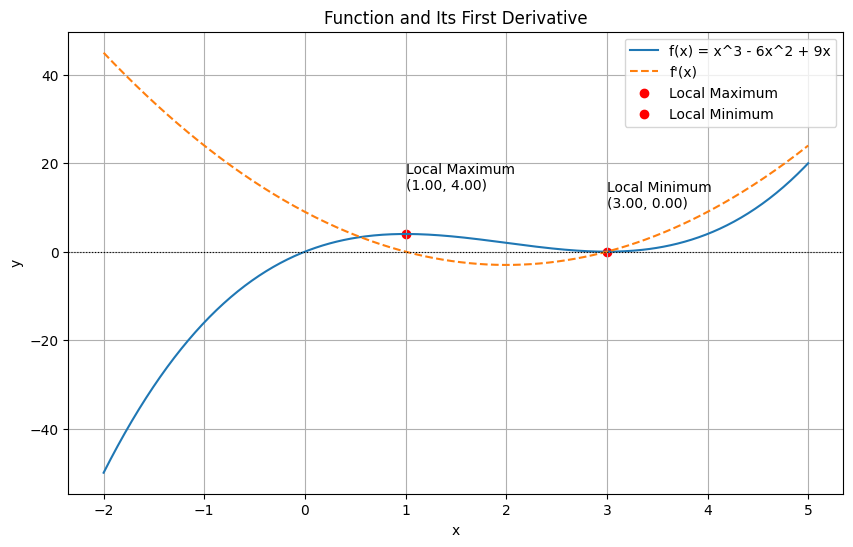

In [35]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Define the variable
x = sp.Symbol('x')

# Define the function
f = x**3 - 6*x**2 + 9*x

# Calculate the first derivative
f_prime = sp.diff(f, x)

# Calculate the second derivative
f_double_prime = sp.diff(f_prime, x)

# Find the critical points by solving f'(x) = 0
critical_points = sp.solve(f_prime, x)

# Classify the critical points using the second derivative test
extrema_info = []
for point in critical_points:
    second_derivative_at_point = f_double_prime.subs(x, point)
    if second_derivative_at_point > 0:
        extrema_info.append((point, 'Local Minimum'))
    elif second_derivative_at_point < 0:
        extrema_info.append((point, 'Local Maximum'))
    else:
        extrema_info.append((point, 'Inconclusive'))

# Convert symbolic expressions to Python functions for plotting
f_func = sp.lambdify(x, f, 'numpy')
f_prime_func = sp.lambdify(x, f_prime, 'numpy')

# Generate x values for plotting
x_vals = np.linspace(-2, 5, 400)

# Plot the function and its first derivative
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_func(x_vals), label='f(x) = x^3 - 6x^2 + 9x')
plt.plot(x_vals, f_prime_func(x_vals), label="f'(x)", linestyle='dashed')
plt.axhline(0, color='black', linewidth=0.8, linestyle='dotted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and Its First Derivative')
plt.legend()
plt.grid(True)

# Plot critical points and their classifications
for point, classification in extrema_info:
    plt.scatter(point, f_func(point), color='red', label=classification)
    plt.annotate(f'{classification}\n({point:.2f}, {f_func(point):.2f})', (point, f_func(point) + 10))

plt.legend()
plt.show()

### using numpy and pandas

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("./data/price/EURUSD.csv")

# Forward fill (replace null values with previous values)
df = df.fillna(method='ffill')

null_values = df.isnull().any()
null_values

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


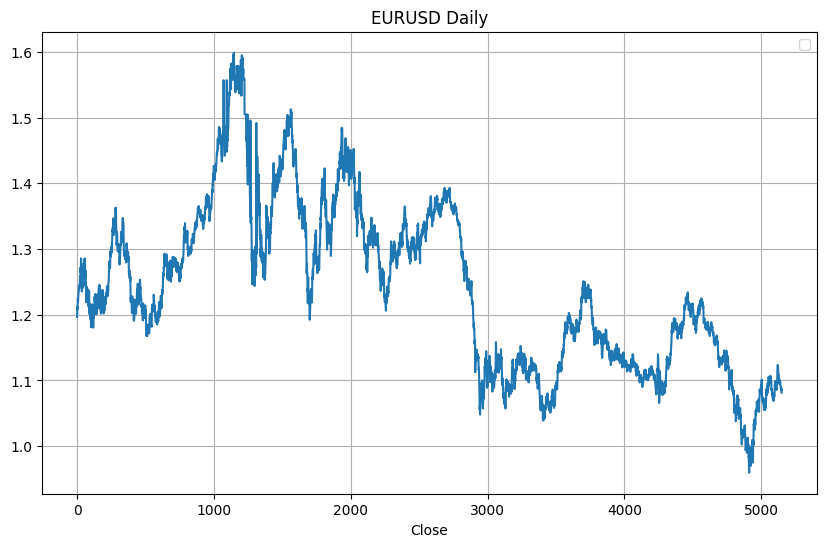

In [37]:
df['y'] = df['Close']**2 + 2 * df['Close'] + 1  # Quadratic function: y = x^2 + 2x + 1

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'])
plt.xlabel('Close')
plt.title('EURUSD Daily')
plt.legend()
plt.grid()
plt.show()

In [38]:
#epsilon to make value non-zero
epsilon = 1e-10
df['first_derivative'] = np.gradient(df['y'], df['Close'] + epsilon)
df['second_derivative'] = np.gradient(df['first_derivative'], df['Close'] + epsilon)

# Find critical points (where first derivative is close to zero)
critical_points = df[np.isclose(df['first_derivative'], 0)]

# Apply the first derivative test
df['extrema_type'] = None
df.loc[df['first_derivative'] < 0, 'extrema_type'] = 'Local Maxima'
df.loc[df['first_derivative'] > 0, 'extrema_type'] = 'Local Minima'

# Apply the second derivative test
df.loc[df['second_derivative'] > 0, 'extrema_type'] = 'Local Minima'
df.loc[df['second_derivative'] < 0, 'extrema_type'] = 'Local Maxima'

df.head(10)

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:1239: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:1239: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:1240: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:1240: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:1241: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\ACER\AppData\Local\Programs\Python\Python

,Date,Open,High,Low,Close,Adj Close,Volume,y,first_derivative,second_derivative,extrema_type
0,2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0.0,4.824617,4.405398,1.000000,Local Minima
1,2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0.0,4.879226,4.417794,1.784706,Local Minima
2,2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0.0,4.894262,4.424596,2.000000,Local Minima
3,2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0.0,4.875679,4.416188,2.000000,Local Minima
4,2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0.0,4.922608,4.437390,2.000000,Local Minima
5,2003-12-08,1.216797,1.224005,1.215407,1.222001,1.222001,0.0,4.937288,4.444002,2.000000,Local Minima
6,2003-12-09,1.222105,1.227702,1.219795,1.224995,1.224995,0.0,4.950603,4.449990,2.000000,Local Minima
7,2003-12-10,1.224905,1.226603,1.216205,1.219096,1.219096,0.0,4.924387,4.438192,2.000000,Local Minima
8,2003-12-11,1.219096,1.223496,1.212298,1.222404,1.222404,0.0,4.939080,4.444808,2.000000,Local Minima
9,2003-12-12,1.222703,1.230603,1.221300,1.227898,1.227898,0.0,4.963529,4.455796,2.000000,Local Minima


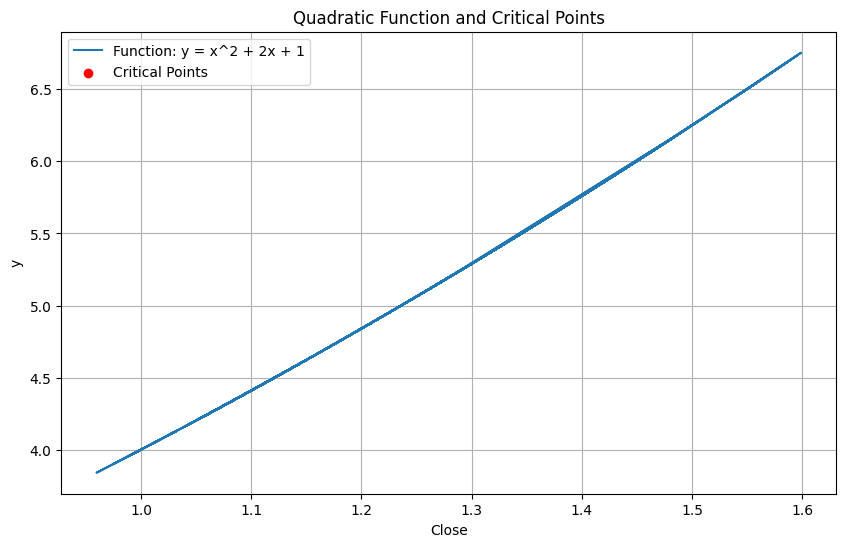

In [39]:

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], df['y'], label='Function: y = x^2 + 2x + 1')
plt.scatter(critical_points['Close'], critical_points['y'], color='red', label='Critical Points')
plt.xlabel('Close')
plt.ylabel('y')
plt.title('Quadratic Function and Critical Points')
plt.legend()
plt.grid()
plt.show()